In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [10]:
x_train = np.load('drive/My Drive/dataset/all_img_x_512.npy')
y_train = np.load('drive/My Drive/dataset/all_mask_y_512.npy')
x_val = np.load('drive/My Drive/dataset/img_data.npy')
# y_val = np.load('drive/My Drive/dataset/train_mask_val_512.npy')

IMG_WIDTH = 512
IMG_HEIGHT = 512
IMG_CHANNELS = 3

print(x_train.shape, y_train.shape)
print(x_val.shape)

(2011, 512, 512, 3) (2011, 512, 512, 1)
(207, 512, 512, 3)


In [ ]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

c1 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c5)

u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 512, 512, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 512, 512, 16) 0           conv2d[0][0]                     
_______________________________________________________________________________________

In [ ]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_val, y_val),epochs=500, batch_size=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=15, monitor='val_loss')])

Epoch 1/500
2011/2011 [==============================] - 50s 25ms/step - loss: 0.3005 - accuracy: 0.9114 - val_loss: 0.2666 - val_accuracy: 0.9244
Epoch 2/500
2011/2011 [==============================] - 50s 25ms/step - loss: 0.3012 - accuracy: 0.9114 - val_loss: 0.2606 - val_accuracy: 0.9244
Epoch 3/500
2011/2011 [==============================] - 50s 25ms/step - loss: 0.2972 - accuracy: 0.9114 - val_loss: 0.2616 - val_accuracy: 0.9244
Epoch 4/500
2011/2011 [==============================] - 50s 25ms/step - loss: 0.2948 - accuracy: 0.9114 - val_loss: 0.2579 - val_accuracy: 0.9244
Epoch 5/500
2011/2011 [==============================] - 50s 25ms/step - loss: 0.2939 - accuracy: 0.9114 - val_loss: 0.2560 - val_accuracy: 0.9244
Epoch 6/500
2011/2011 [==============================] - 50s 25ms/step - loss: 0.2921 - accuracy: 0.9113 - val_loss: 0.2649 - val_accuracy: 0.9244
Epoch 7/500
2011/2011 [==============================] - 50s 25ms/step - loss: 0.2913 - accuracy: 0.9114 - val_loss: 0

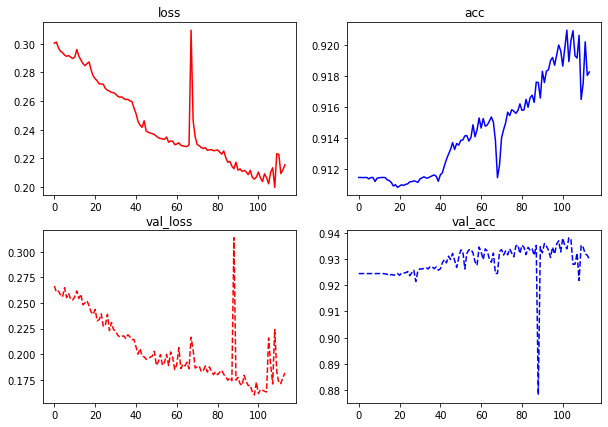

In [ ]:
fig, ax = plt.subplots(2, 2,figsize=(10,7))

ax[0,0].set_title('loss')
ax[0,0].plot(history.history['loss'], 'r')
ax[0,1].set_title('acc')
ax[0,1].plot(history.history['accuracy'], 'b')

ax[1,0].set_title('val_loss') 
ax[1,0].plot(history.history['val_loss'], 'r--')
ax[1,1].set_title('val_acc')
ax[1,1].plot(history.history['val_accuracy'], 'b--')

In [ ]:
print(type(x_val))
print(x_val.shape)

<class 'numpy.ndarray'>
(84, 512, 512, 3)


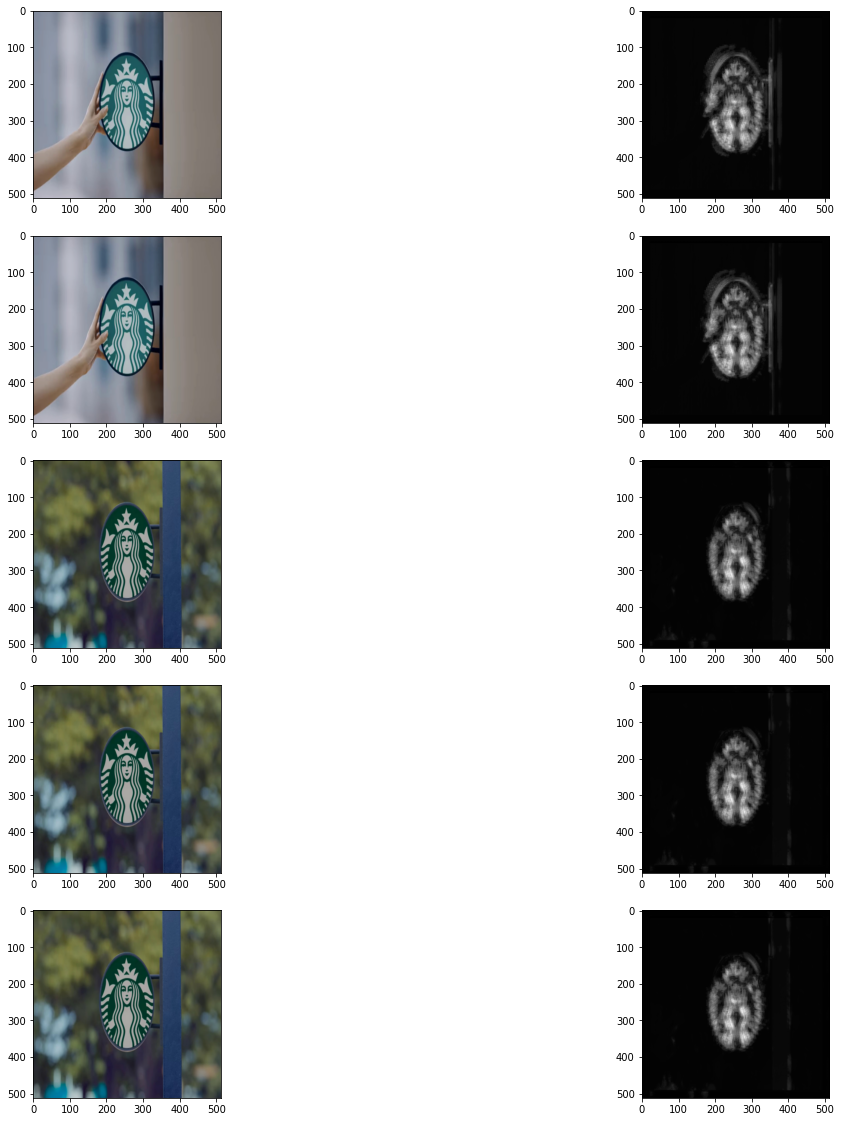

In [12]:
preds = new_model.predict(x_val)
fig, ax = plt.subplots(5, 2, figsize = (20,20))
count = 0
for i, pred in enumerate(preds):
    if count == 5: break
    ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')
    # ax[i, 1].imshow(y_val[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(pred.squeeze(), cmap='gray')
    count += 1

In [ ]:
model.save('drive/My Drive/model/first_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: drive/My Drive/model/first_model/assets


In [11]:
new_model = tf.keras.models.load_model('drive/My Drive/model/first_model')
new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 512, 512, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 512, 512, 16) 0           conv2d[0][0]                     
_______________________________________________________________________________________